In [2]:
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, callbacks

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [6]:
train_data = pd.read_csv('train.csv', index_col=0)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
num_data = train_data.select_dtypes(exclude='object')
num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
cat_data = train_data.select_dtypes('object')
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
cat_data.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [12]:
cat_data.nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [19]:
data = num_data.dropna(axis=1)
data.isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [21]:
df_train = data.sample(frac=0.2, random_state=0)
df_valid = data.drop(df_train.index)
df_train.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
530,20,32668,6,3,1957,1975,1219,0,816,2035,...,0,0,200,0,0,0,0,3,2007,200624
492,50,9490,6,7,1941,1950,403,165,238,806,...,0,0,32,0,0,0,0,8,2006,133000
460,50,7015,5,4,1950,1950,185,0,524,709,...,0,0,248,0,0,0,0,7,2009,110000


In [22]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
max_

MSSubClass          190
LotArea           63887
OverallQual          10
OverallCond           9
YearBuilt          2009
YearRemodAdd       2009
BsmtFinSF1         5644
BsmtFinSF2         1474
BsmtUnfSF          2336
TotalBsmtSF        6110
1stFlrSF           4692
2ndFlrSF           2065
LowQualFinSF        479
GrLivArea          5642
BsmtFullBath          2
BsmtHalfBath          2
FullBath              3
HalfBath              2
BedroomAbvGr          6
KitchenAbvGr          2
TotRmsAbvGrd         12
Fireplaces            3
GarageCars            4
GarageArea         1418
WoodDeckSF          857
OpenPorchSF         292
EnclosedPorch       252
3SsnPorch           407
ScreenPorch         440
PoolArea            555
MiscVal            2000
MoSold               12
YrSold             2010
SalePrice        745000
dtype: int64

In [23]:
scaled_train = (df_train - min_) / (max_ - min_)
scaled_valid = (df_train - min_) / (max_ - min_)

scaled_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
530,0.000000,0.499776,0.428571,0.000000,0.590551,0.423729,0.215982,0.00000,0.349315,0.333061,...,0.000000,0.000000,0.793651,0.0,0.0,0.0,0.0,0.181818,0.25,0.197086
492,0.176471,0.128393,0.428571,0.666667,0.464567,0.000000,0.071403,0.11194,0.101884,0.131915,...,0.000000,0.000000,0.126984,0.0,0.0,0.0,0.0,0.636364,0.00,0.097345
460,0.176471,0.088736,0.285714,0.166667,0.535433,0.000000,0.032778,0.00000,0.224315,0.116039,...,0.000000,0.000000,0.984127,0.0,0.0,0.0,0.0,0.545455,0.75,0.063422
280,0.235294,0.136645,0.571429,0.333333,0.748031,0.457627,0.069454,0.00000,0.328767,0.189853,...,0.336056,0.400685,0.000000,0.0,0.0,0.0,0.0,0.181818,0.50,0.184366
656,0.823529,0.003253,0.428571,0.333333,0.700787,0.355932,0.000000,0.00000,0.224743,0.085925,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.181818,1.00,0.030973


In [26]:
X_train = scaled_train.drop('SalePrice', axis=1)
X_valid = scaled_valid.drop('SalePrice', axis=1)
X_train.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
530,0.000000,0.499776,0.428571,0.000000,0.590551,0.423729,0.215982,0.00000,0.349315,0.333061,...,0.341326,0.0,0.0,0.793651,0.0,0.0,0.0,0.0,0.181818,0.25
492,0.176471,0.128393,0.428571,0.666667,0.464567,0.000000,0.071403,0.11194,0.101884,0.131915,...,0.169252,0.0,0.0,0.126984,0.0,0.0,0.0,0.0,0.636364,0.00
460,0.176471,0.088736,0.285714,0.166667,0.535433,0.000000,0.032778,0.00000,0.224315,0.116039,...,0.248237,0.0,0.0,0.984127,0.0,0.0,0.0,0.0,0.545455,0.75


In [27]:
y_train = scaled_train.SalePrice
y_valid = scaled_valid.SalePrice

y_train.head(3)

Id
530    0.197086
492    0.097345
460    0.063422
Name: SalePrice, dtype: float64

In [28]:
len(X_train.columns)

33

In [29]:
model = keras.Sequential([
    layers.Dense(248, input_shape=[33]),
    layers.Dense(248),
    layers.Dense(248),
    layers.Dense(1)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
model.compile(optimizer='adam', loss='mae')

In [31]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data = [X_valid, y_valid],
    batch_size = 256,
    epochs = 250,
    callbacks = [early_stopping]
)

Train on 292 samples, validate on 292 samples
Epoch 1/250
292/292 [==============================] - 0s 928us/sample - loss: 0.2874 - val_loss: 0.6163
Epoch 2/250
292/292 [==============================] - 0s 75us/sample - loss: 0.5640 - val_loss: 0.3887
Epoch 3/250
292/292 [==============================] - 0s 77us/sample - loss: 0.3744 - val_loss: 0.0951
Epoch 4/250
292/292 [==============================] - 0s 71us/sample - loss: 0.1131 - val_loss: 0.2069
Epoch 5/250
292/292 [==============================] - 0s 75us/sample - loss: 0.1939 - val_loss: 0.1180
Epoch 6/250
292/292 [==============================] - 0s 75us/sample - loss: 0.1239 - val_loss: 0.1395
Epoch 7/250
292/292 [==============================] - 0s 62us/sample - loss: 0.1300 - val_loss: 0.0974
Epoch 8/250
292/292 [==============================] - 0s 84us/sample - loss: 0.1019 - val_loss: 0.0906
Epoch 9/250
292/292 [==============================] - 0s 72us/sample - loss: 0.0878 - val_loss: 0.0696
Epoch 10/250
292/

In [34]:
history_df = pd.DataFrame(history.history)
history_df.head(3)

,loss,val_loss
0,0.287404,0.616345
1,0.563971,0.388746
2,0.374407,0.095147


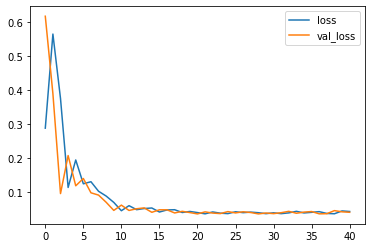

In [35]:
history_df.loc[:, ['loss', 'val_loss']].plot()